In [0]:
from fastai import *
from fastai.vision import *

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
folder = 'black'
file = 'black.csv'

path = Path('drive/My Drive/colab_data/fastai/lec2/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(dest/file, dest, max_pics =200)

In [0]:
folder = 'teddys'
file = 'teddys.csv'

path = Path('drive/My Drive/colab_data/fastai/lec2/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(dest/file, dest, max_pics =200)

In [47]:
folder = 'grizzly'
file = 'grizzly.csv'

path = Path('drive/My Drive/colab_data/fastai/lec2/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(dest/file, dest, max_pics =200)

In [48]:
path.ls()

[PosixPath('drive/My Drive/colab_data/fastai/lec2/data/bears/black'),
 PosixPath('drive/My Drive/colab_data/fastai/lec2/data/bears/teddys'),
 PosixPath('drive/My Drive/colab_data/fastai/lec2/data/bears/grizzly')]

In [0]:
classes = ['teddys','grizzly','black']
files = ['black.csv','teddys.csv','grizzly.csv']

In [0]:
download_images(dest/file, dest, max_pics =200)

In [49]:
# Verify if the downloaded files actually are images
for c in classes:
    print(c)
    verify_images(path/c, delete=True,max_size=500)

teddys


grizzly


black


In [0]:
# Initial transformations

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [0]:
#verify that classes have been absorbed
data.classes

['black', 'grizzly']

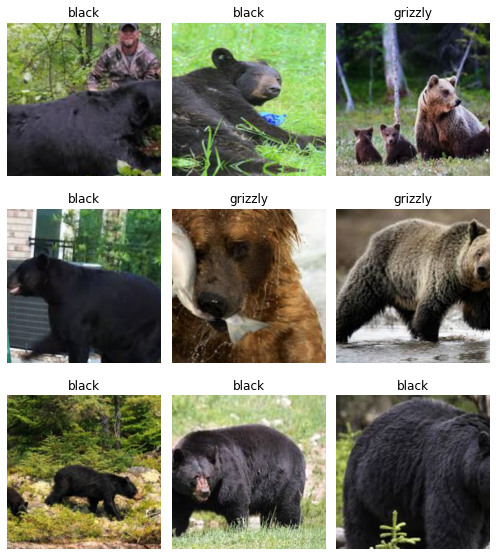

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [52]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 326, 81)

In [53]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [54]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.393034,0.324587,0.049383,00:05
1,0.829986,0.423565,0.037037,00:04
2,0.618940,0.527770,0.074074,00:04
3,0.472828,0.515996,0.074074,00:04


In [0]:
learn.save('stage-1')

In [0]:
learner = learn.load('stage-1')

In [0]:
learn.unfreeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


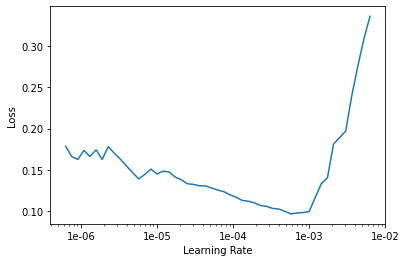

In [57]:
learn.recorder.plot()

In [58]:
# By simply choosing a learning rate wisely we could reduce the error rate a lot. 
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.218910,0.588064,0.061728,00:04
1,0.159814,0.584370,0.061728,00:04


In [0]:
learn.save('stage-2')

In [0]:
# Interpretation

learn.load('stage-2')

In [61]:
interp = ClassificationInterpretation.from_learner(learn)

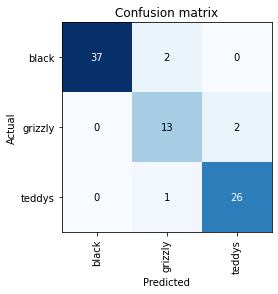

In [63]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [67]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)